In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('Churn_Modelling.csv', usecols=['CreditScore', 'Age', 'Exited'])
data.head(10)

,CreditScore,Age,Exited
0,619,42,1
1,608,41,0
2,502,42,1
3,699,39,0
4,850,43,0
5,645,44,1
6,822,50,0
7,376,29,1
8,501,44,0
9,684,27,0


In [30]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


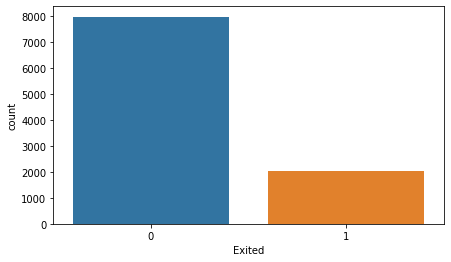

In [52]:
def Count_Plot(data, col):
  plt.figure(figsize=(7,4))
  sns.countplot(data[col])
  plt.show()

Count_Plot(data, 'Exited')

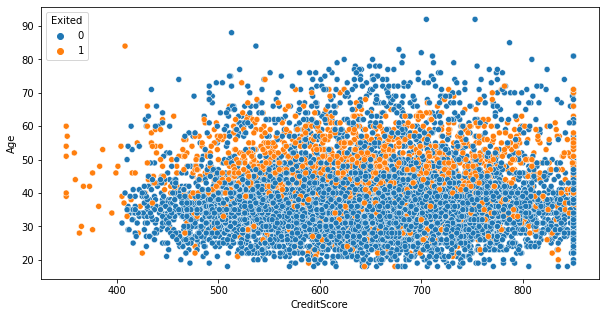

In [51]:
def Scatter_Plot(data, x, y, hue):
  plt.figure(figsize=(10, 5))
  sns.scatterplot(data=data, x=x, y=y, hue=hue)
  plt.show()

Scatter_Plot(data, 'CreditScore', 'Age', 'Exited')

# **1. SMOTE (Synthetic Minority Oversampling Technique):**

In [91]:
def SMOTE_Oversampling(data, Y_col):
  from imblearn.over_sampling import SMOTE
  smote = SMOTE(random_state=101) # by default neighbors = 5 (minority points)
  X = data.drop(axis=1, columns=Y_col)
  Y = data[Y_col]

  X, Y = smote.fit_resample(X, Y)
  data_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
  data_oversampler[Y_col] = Y
  return data_oversampler

In [44]:
data_SMOTE = SMOTE_Oversampling(data, 'Exited')
data_SMOTE.head(10)

,CreditScore,Age,Exited
0,619,42,1
1,608,41,0
2,502,42,1
3,699,39,0
4,850,43,0
5,645,44,1
6,822,50,0
7,376,29,1
8,501,44,0
9,684,27,0


In [45]:
data_SMOTE.shape

(15926, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


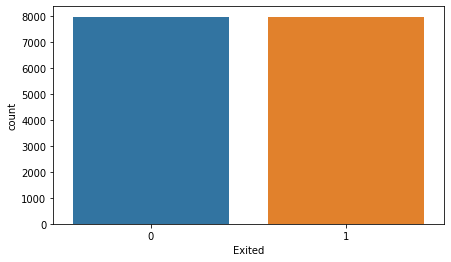

In [46]:
plt.figure(figsize=(7,4))
sns.countplot(data_SMOTE['Exited'])
plt.show()

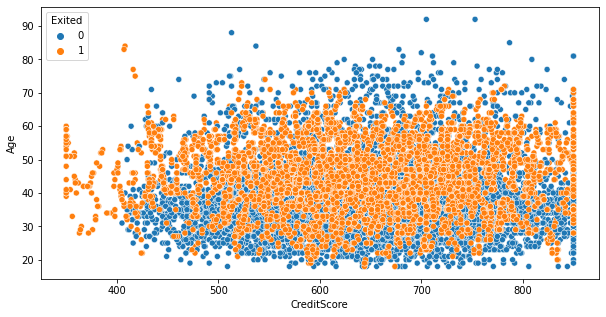

In [47]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = data_SMOTE, x ='CreditScore', y = 'Age', hue = 'Exited')
plt.show()

# **2. Borderline-SMOTE:**





In [67]:
def Broderline_SMOTE(data, Y_col):
  from imblearn.over_sampling import BorderlineSMOTE
  bsmote = BorderlineSMOTE(random_state=101, kind='borderline-1')
  X = data.drop(axis=1, columns=Y_col)
  Y = data[Y_col]

  X, Y = bsmote.fit_resample(X, Y)
  data_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
  data_oversampler[Y_col] = Y
  return data_oversampler

In [49]:
data_Broderline_SMOTE = Broderline_SMOTE(data, 'Exited')
data_Broderline_SMOTE.head(5)

,CreditScore,Age,Exited
0,619,42,1
1,608,41,0
2,502,42,1
3,699,39,0
4,850,43,0


In [50]:
data_Broderline_SMOTE.shape

(15926, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


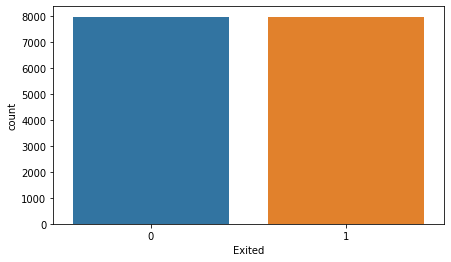

In [54]:
Count_Plot(data_Broderline_SMOTE, 'Exited')

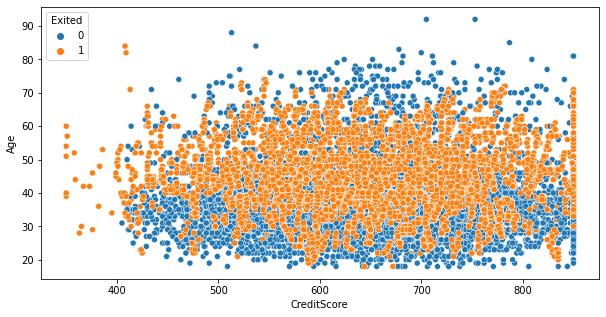

In [55]:
Scatter_Plot(data_Broderline_SMOTE, 'CreditScore', 'Age', 'Exited')

# **3. SMOTE-NC:**

In [57]:
data = pd.read_csv('Churn_Modelling.csv', usecols=['CreditScore', 'IsActiveMember', 'Exited'])
data.head(5)

,CreditScore,IsActiveMember,Exited
0,619,1,1
1,608,1,0
2,502,0,1
3,699,0,0
4,850,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


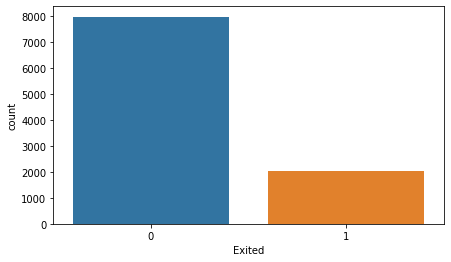

In [58]:
Count_Plot(data, 'Exited')

In [62]:
def SMOTE_NC(data, Y_col):
  from imblearn.over_sampling import SMOTENC
  smoteNC = SMOTENC( categorical_features=[1], random_state=101, k_neighbors=5, n_jobs=-1)

  X = data.drop(axis=1, columns=Y_col)
  Y = data[Y_col]

  X, Y = smoteNC.fit_resample(X, Y)
  data_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'IsActiveMember'])
  data_oversampler[Y_col] = Y
  return data_oversampler

In [63]:
data_smoteNC = SMOTE_NC(data, 'Exited')
data_smoteNC.head(10)

,CreditScore,IsActiveMember,Exited
0,619,1,1
1,608,1,0
2,502,0,1
3,699,0,0
4,850,1,0
5,645,0,1
6,822,1,0
7,376,0,1
8,501,1,0
9,684,1,0


In [64]:
data_smoteNC.shape

(15926, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


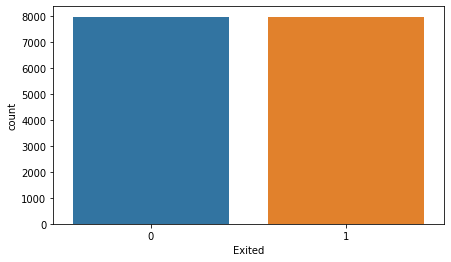

In [66]:
Count_Plot(data_smoteNC, 'Exited')

# **4. SVM-SMOTE:**

In [68]:
data = pd.read_csv('Churn_Modelling.csv', usecols=['CreditScore', 'Age', 'Exited'])
data.head(5)

,CreditScore,Age,Exited
0,619,42,1
1,608,41,0
2,502,42,1
3,699,39,0
4,850,43,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


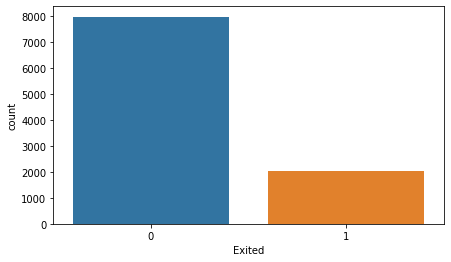

In [69]:
Count_Plot(data, 'Exited')

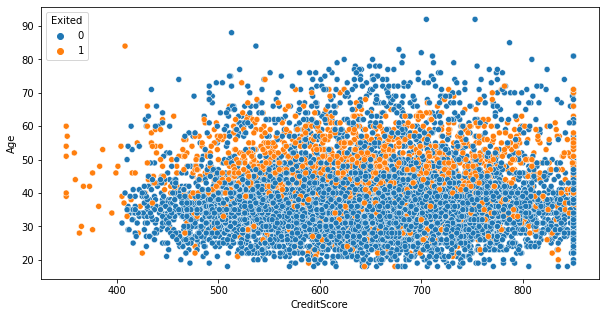

In [70]:
Scatter_Plot(data, 'CreditScore', 'Age', 'Exited')

In [73]:
def SVM_SMOTE(data, Y_col):
  from imblearn.over_sampling import SVMSMOTE
  svmSMOTE = SVMSMOTE(random_state=101, k_neighbors=5, n_jobs=-1)

  X = data.drop(axis=1, columns=Y_col)
  Y = data[Y_col]

  X, Y = svmSMOTE.fit_resample(X, Y)
  data_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
  data_oversampler[Y_col] = Y
  return data_oversampler

In [74]:
data_svmSMOTE = SVM_SMOTE(data, 'Exited')
data_svmSMOTE.head(10)

,CreditScore,Age,Exited
0,619,42,1
1,608,41,0
2,502,42,1
3,699,39,0
4,850,43,0
5,645,44,1
6,822,50,0
7,376,29,1
8,501,44,0
9,684,27,0


In [75]:
data_svmSMOTE.shape

(15926, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


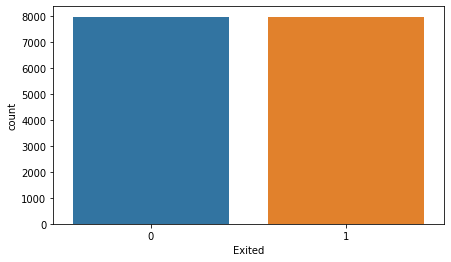

In [77]:
Count_Plot(data_svmSMOTE, 'Exited')

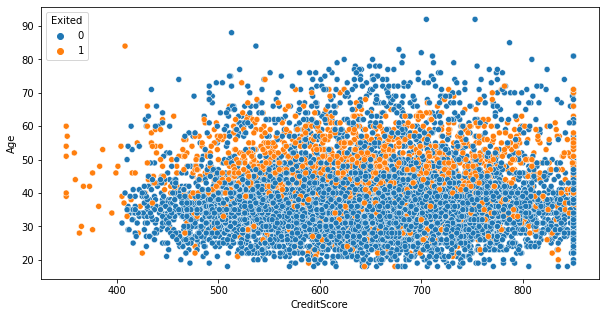

In [78]:
Scatter_Plot(data, 'CreditScore', 'Age', 'Exited')

# **5. ADASYN:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


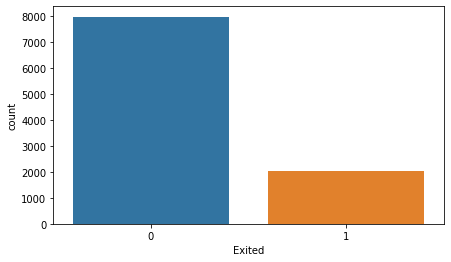

In [79]:
Count_Plot(data, 'Exited')

In [82]:
def ADASYN_Sampling(data, Y_col):
  from imblearn.over_sampling import ADASYN
  adasyn = ADASYN(random_state=101)

  X = data.drop(axis=1, columns=Y_col)
  Y = data[Y_col]

  X, Y = adasyn.fit_resample(X, Y)
  data_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
  data_oversampler[Y_col] = Y
  return data_oversampler

In [83]:
data_ADASYN = ADASYN_Sampling(data, 'Exited')
data_ADASYN.head(10)

,CreditScore,Age,Exited
0,619,42,1
1,608,41,0
2,502,42,1
3,699,39,0
4,850,43,0
5,645,44,1
6,822,50,0
7,376,29,1
8,501,44,0
9,684,27,0


In [86]:
data_ADASYN.shape

(16408, 3)

In [88]:
data_ADASYN['Exited'].value_counts()

1    8445
0    7963
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


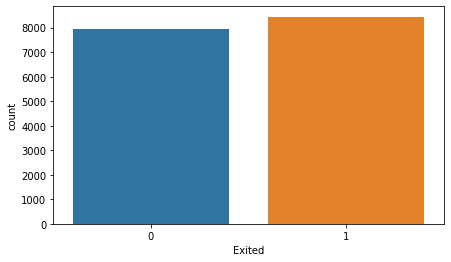

In [85]:
Count_Plot(data_ADASYN, 'Exited')

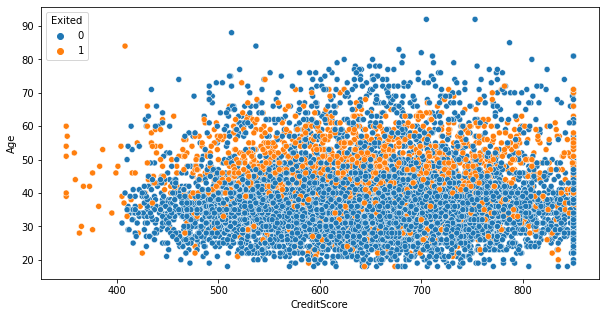

In [87]:
Scatter_Plot(data, 'CreditScore', 'Age', 'Exited')